## Name: Leeja Sagar Shrestha
## Group: L6CG7

**WORKSHEET 5**

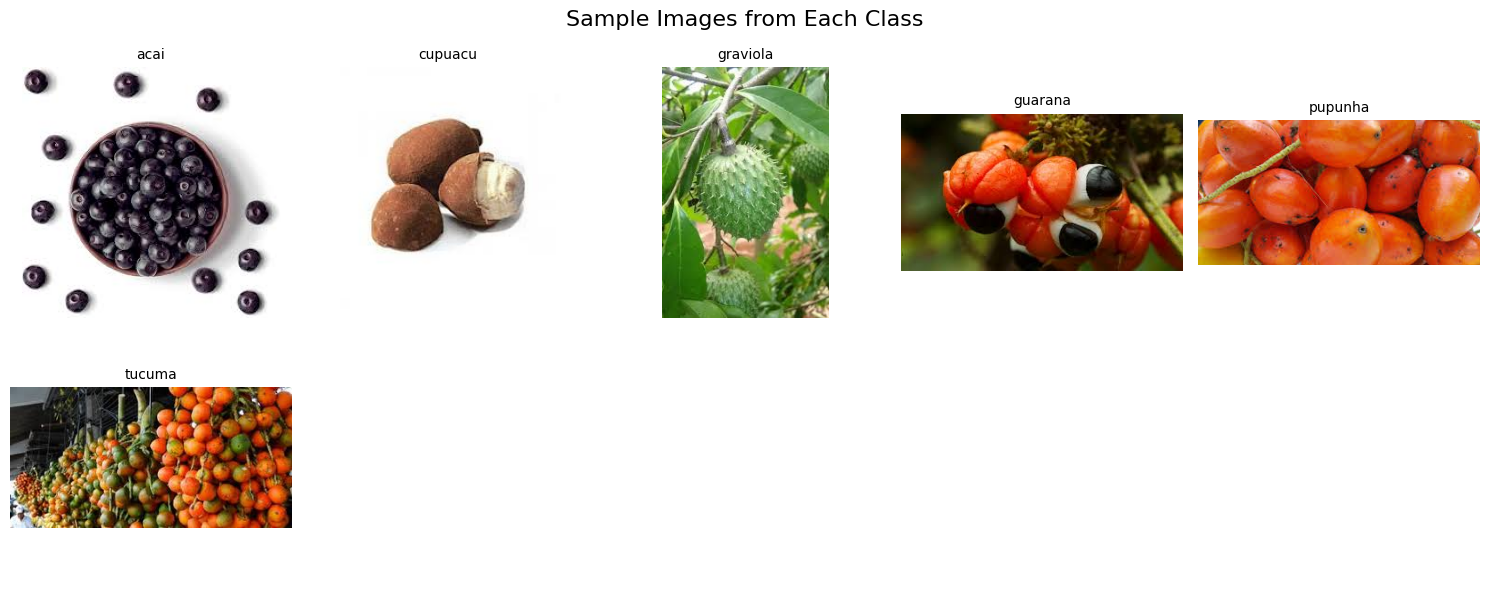

In [26]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [27]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [28]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Leeja_Shrestha.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.1453 - loss: 1.8429
Epoch 1: val_loss improved from inf to 1.77099, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1437 - loss: 1.8499 - val_accuracy: 0.0000e+00 - val_loss: 1.7710
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.0747 - loss: 1.8023
Epoch 2: val_loss improved from 1.77099 to 1.51883, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.0768 - loss: 1.8043 - val_accuracy: 0.7778 - val_loss: 1.5188
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.3397 - loss: 1.6600
Epoch 3: val_loss did not improve from 1.51883
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.3416 - loss: 1.6588 - val_accuracy: 0.0556 - val_loss: 1.9595
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.3021 - loss: 1.5596
Epoch 4: val_loss improved from 1.51883 to 1.51020, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - accuracy: 0.3203 - loss: 1.5490 - val_accuracy: 0.4444 - val_loss: 1.5102
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.6042 - loss: 1.2894
Epoch 5: val_loss improved from 1.51020 to 1.14698, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - accuracy: 0.6094 - loss: 1.2856 - val_accuracy: 0.6667 - val_loss: 1.1470
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.6487 - loss: 1.0561
Epoch 6: val_loss did not improve from 1.14698
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 832ms/step - accuracy: 0.6567 - loss: 1.0546 - val_accuracy: 0.5000 - val_loss: 1.5984
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.6302 - loss: 0.9420
Epoch 7: val_loss did not improve from 1.14698
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 697ms/step - accuracy: 0.6289 - loss: 0.9401 - val_accuracy: 0.7222 - val_loss: 1.2306
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.7650 - loss: 0.8351
Epoch 8: val_loss improved from 1.14698 to 0.85008, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 587ms/step - accuracy: 0.7648 - loss: 0.8251 - val_accuracy: 0.7778 - val_loss: 0.8501
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.9103 - loss: 0.4555
Epoch 9: val_loss improved from 0.85008 to 0.58426, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 0.9084 - loss: 0.4555 - val_accuracy: 0.7222 - val_loss: 0.5843
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.9300 - loss: 0.3076
Epoch 10: val_loss did not improve from 0.58426
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 548ms/step - accuracy: 0.9301 - loss: 0.3040 - val_accuracy: 0.7222 - val_loss: 0.7523
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9699 - loss: 0.1739
Epoch 11: val_loss improved from 0.58426 to 0.50313, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 914ms/step - accuracy: 0.9705 - loss: 0.1683 - val_accuracy: 0.8333 - val_loss: 0.5031
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9699 - loss: 0.1066
Epoch 12: val_loss improved from 0.50313 to 0.45352, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.9705 - loss: 0.1044 - val_accuracy: 0.8333 - val_loss: 0.4535
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9797 - loss: 0.0538
Epoch 13: val_loss improved from 0.45352 to 0.44607, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 0.9813 - loss: 0.0528 - val_accuracy: 0.8333 - val_loss: 0.4461
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.0225
Epoch 14: val_loss did not improve from 0.44607
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.8333 - val_loss: 0.4838
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 15: val_loss improved from 0.44607 to 0.44597, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.8333 - val_loss: 0.4460
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 1.0000 - loss: 0.0092
Epoch 16: val_loss did not improve from 0.44597
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 770ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.8333 - val_loss: 0.4523
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 17: val_loss did not improve from 0.44597
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8333 - val_loss: 0.4815
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 1.0000 - loss: 0.0036
Epoch 18: val_loss did not improve from 0.44597
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.8333 - val_loss: 0.5161
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 19: val_loss did not improve from 0.44597
3/3 

In [32]:
test_dir = '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.7000 - loss: 142.9379
Test Loss: 142.93788146972656
Test Accuracy: 0.699999988079071


In [33]:

model.save('Leeja_Shrestha_Model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.38      0.60      0.46         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      0.60      0.75         5
           5       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.78      0.70      0.70        30
weighted avg       0.78      0.70      0.70        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 1: val_loss did not improve from 0.44597
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8333 - val_loss: 0.5368
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0097
Epoch 2: val_loss did not improve from 0.44597
3/3 ━━━━━━━━━━━━

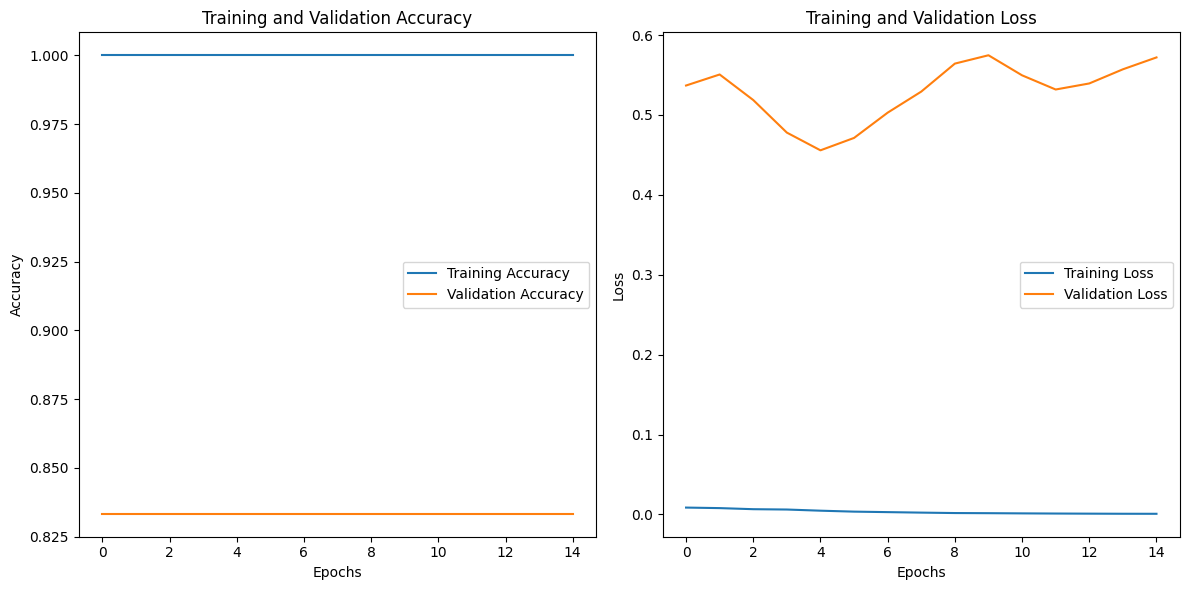

Model saved as 'Leeja_Shrestha_model.h5'


In [34]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Leeja_Shrestha_Model.h5')
print("Model saved as 'Leeja_Shrestha_model.h5'")
